# 📘 아메리칸 풋옵션 가격 계산


## ✅ 문제  
다음은 풋옵션과 관련된 정보입니다:

- 옵션 유형: **아메리칸 풋옵션**
- 현재 주가: 100  
- 행사가격: 100  
- 무위험이자율: 6%  
- 배당률: 0%  
- 변동성: 20%  
- 만기: 5년  
- 이항트리 스텝 수: 200  
- 시간 간격: $dt = \frac{T}{N} = \frac{5}{200}$

> 풋옵션의 가격을 소수점 **네 번째 자리까지 반올림**하여 구하시오.  
> 예: `0.12345 → 0.1235`  
>  
> 또한 소수점 처리를 위해 코드 상단에  
> `np.set_printoptions(precision=4, suppress=True)`  
> 를 사용하시오.


## 🧮 해설



### 1. 이항 트리(Binomial Tree) 개념  
이 모델은 옵션 만기까지 주가가 매 스텝마다 오르거나 내리는 이산적 구조를 따릅니다.  
각 노드마다 주가 및 옵션 가치를 계산하고, 거꾸로(backward) 올라가며 현재 가치를 구합니다.

---

### 2. 사용되는 수식

- 상승률:  
  $u = e^{\sigma \sqrt{dt}}$

- 하락률:  
  $d = \frac{1}{u}$

- 리스크 중립 확률:  
  $p = \frac{e^{(r - q) dt} - d}{u - d}$

- 할인율:  
  $\text{discount} = e^{-r dt}$

---

### 3. 아메리칸 풋옵션의 특징  
- 유럽형 옵션과 달리, 만기 이전에도 **조기행사 가능**
- 따라서 각 시점에서의 옵션 가치는 다음 중 **더 큰 값**으로 결정됨:  
  - 보유 가치 (기대 현재가치)  
  - 즉시 행사 가치


In [27]:
import numpy as np

# 소수점 설정
np.set_printoptions(precision=4, suppress=True)

# 파라미터 설정
S0 = 100         # 현재 주가
K = 100          # 행사가격 (Strike Price)
r = 0.06         # 무위험이자율
q = 0.0          # 배당률 (Dividend yield, quotient에서 약자를 따옴)
sigma = 0.20     # 변동성
T = 5            # 만기
N = 200          # 스텝 수

# 시간 간격
dt = T / N
u = np.exp(sigma * np.sqrt(dt))        # 상승 비율
d = 1 / u                              # 하락 비율
p = (np.exp((r - q) * dt) - d) / (u - d)  # 리스크 중립 확률
discount = np.exp(-r * dt)             # 할인율

# 주가 트리 구성
stock_tree = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

# 옵션 가치 트리 구성 (아메리칸 풋옵션)
option_tree = np.zeros((N + 1, N + 1))
# 만기 시점의 풋옵션 가치
option_tree[:, N] = np.maximum(K - stock_tree[:, N], 0)

# 백워드 루핑으로 옵션 가격 계산
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        hold = discount * (p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1])
        exercise = K - stock_tree[j, i]
        option_tree[j, i] = max(hold, exercise)  # 아메리칸 옵션이므로 조기행사 고려

# 결과
option_price = option_tree[0, 0]
option_price = round(option_price, 4)
option_price


8.9765

In [28]:
import numpy as np

np.set_printoptions(precision = 4, suppress = True)

# 파라미터 설정
S0 = 100; K = 90; r = 0.05; q = 0; T = 3; sigma = 0.3; N = 300; T = 3

# Binomial Tree 공식 정리
dt = T/N;
u = np.exp(sigma * np.sqrt(dt)) # u = e^(σ√dt)
d = 1 / u
p = (np.exp((r - q) * dt) - d) / (u - d) # 리스크 중립확률 p = (e^{(r - q)dt} - d) / (u - d)
discount = np.exp(-r * dt) # discount = e^{-r dt}

# 이항모형을 이용한 주식선택권(ESO) 가치 평가

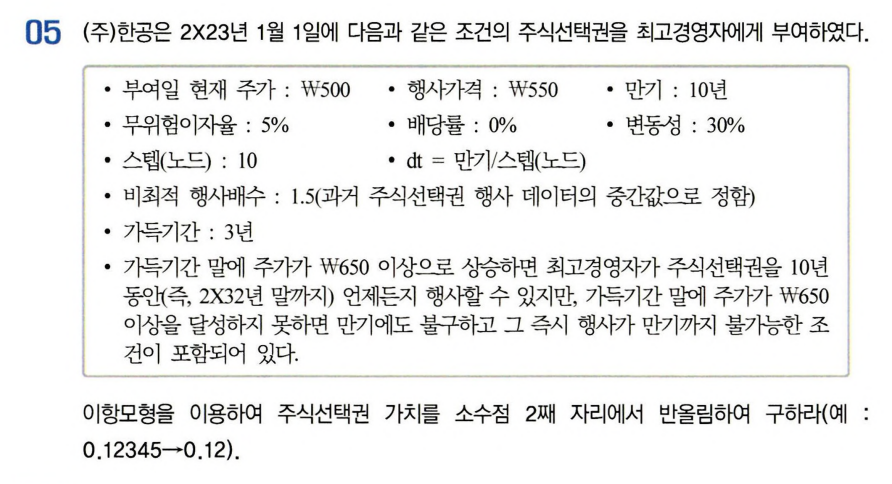

## 문제 조건 요약
- 현재주가 (S₀): 500  
- 행사가격 (K): 550  
- 무위험이자율 (r): 5% (연속복리)  
- 변동성 (σ): 30%  
- 만기 (T): 10년  
- 스텝 수 (N): 10 → dt = 1년  
- 배당률: 0%  
- 가득기간: 3년  
- **가득조건**: 가득기간(3년) 시점에 주가가 **650 이상**이어야 옵션이 유효  
- **조기행사 규칙**: 가득 이후(3년~만기)에는 아메리칸 옵션처럼 조기행사 가능.  
  단, **S ≥ 1.5 × K = 825**일 때만 조기행사 허용.  
- 그 외 조건: 조기행사 불가 시 유럽형처럼 홀딩.  

---

## 풀이 접근 방식

1. **이항모형 파라미터**
   - 상승 비율: $u = e^{\sigma \sqrt{dt}}$  
   - 하락 비율: $d = 1/u$  
   - 위험중립 성장율: $R = e^{r dt}$  
   - 위험중립 확률: $p = \dfrac{R-d}{u-d}$  
   - 할인계수: $e^{-r dt}$


2. **주가 트리 구축**
   - 10단계 이항트리로 주가 경로 생성.

3. **만기 가치**
   - 주가가 650 미만이면 옵션 무가치 (장벽조건).  
   - 그 이상이면 $\max(S-K, 0)$

4. **가득 이후(3년~10년)**
   - 장벽조건 유지: 주가 < 650이면 즉시 소멸.  
   - 주가 ≥ 825이면 즉시 내재가치(강제 조기행사).  
   - 나머지는 `할인기대값 vs 내재가치` 중 큰 값.

5. **가득 시점(3년)**
   - 주가 < 650이면 옵션 소멸.  
   - 주가 ≥ 650이면 이후 아메리칸 규칙 적용.

6. **가득 이전(0~3년)**
   - 조기행사 불가 → 유럽형 옵션처럼 `할인기대값`만으로 역산.

In [29]:
import numpy as np

# 파라미터
S0 = 500       # 현재주가
K  = 550       # 행사가격
r  = 0.05      # 무위험이자율
sigma = 0.30   # 변동성
T  = 10        # 만기(년)
N  = 10        # 스텝 수
q  = 0.0       # 배당률
dt = T / N     # 시간 간격

u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
R = np.exp((r - q) * dt)   # 위험중립 성장
disc = np.exp(-r * dt)     # 할인계수
p = (R - d) / (u - d)

vest_step = int(3/dt)      # 가득 시점 스텝
barrier   = 650            # 장벽
m_mult    = 1.5            # 비적격 행사배수

# 주가 트리 (i: 시간스텝, j: 하락횟수)
S = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(i+1):
        S[j, i] = S0 * (u**(i-j)) * (d**j)
pd.DataFrame(S).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,500.0,674.93,911.06,1229.80,1660.06,2240.84,3024.82,4083.08,5511.59,7439.87,10042.77
1,0.0,370.41,500.00,674.93,911.06,1229.80,1660.06,2240.84,3024.82,4083.08,5511.59
2,0.0,0.00,274.41,370.41,500.00,674.93,911.06,1229.80,1660.06,2240.84,3024.82
3,0.0,0.00,0.00,203.28,274.41,370.41,500.00,674.93,911.06,1229.80,1660.06
4,0.0,0.00,0.00,0.00,150.60,203.28,274.41,370.41,500.00,674.93,911.06
5,0.0,0.00,0.00,0.00,0.00,111.57,150.60,203.28,274.41,370.41,500.00
6,0.0,0.00,0.00,0.00,0.00,0.00,82.65,111.57,150.60,203.28,274.41
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,61.23,82.65,111.57,150.60
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.36,61.23,82.65
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.60,45.36


In [30]:
# 옵션가치 트리 초기화
V = np.zeros((N+1, N+1))

# 만기 시점: S >= barrier이면 콜 내재가치, 아니면 0
V[:N+1, N] = np.where(
    S[:N+1, N] >= barrier,                 # 조건식
    np.maximum(S[:N+1, N] - K, 0.0),       # 조건이 참일 때 값
    0.0                                    # 조건이 거짓일 때 값
)

# 옵션가치 트리 역산 (Backward Induction)
for time in range(N-1, -1, -1):            # 만기 직전(N-1)부터 현재(0)까지 거꾸로 계산
    for node in range(time+1):             # 각 시점(time)에서 가능한 모든 노드(node)
        
        # 1. 장벽(Barrier, 예: 650) 미만이면 옵션은 즉시 소멸 → 가치 0
        if S[node, time] < barrier:
            V[node, time] = 0.0
        
        # 2. 장벽 이상인 경우
        else:
            # (a) 비최적 행사배수 조건 충족 (예: S >= 1.5 * K)
            #     → 즉시 조기행사로 내재가치(S-K)를 취함
            if S[node, time] >= m_mult * K:
                V[node, time] = max(S[node, time] - K, 0.0)
            
            # (b) 배수 조건 미충족 → 조기행사 불가, 계속 보유
            #     → 다음 스텝들의 기대가치를 할인해서 현재가치로 환산
            else:
                V[node, time] = disc * (
                    p * V[node, time+1] +           # 상승했을 때 가치
                    (1-p) * V[node+1, time+1]       # 하락했을 때 가치
                )


# 결과 확인
print(pd.DataFrame(V).round(2))


     0       1       2       3        4        5        6        7        8   \
0   0.0  175.07  361.06  679.80  1110.06  1690.84  2474.82  3533.08  4961.59   
1   0.0    0.00    0.00  175.07   361.06   679.80  1110.06  1690.84  2474.82   
2   0.0    0.00    0.00    0.00     0.00   175.07   361.06   679.80  1110.06   
3   0.0    0.00    0.00    0.00     0.00     0.00     0.00   175.07   361.06   
4   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
5   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
6   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
7   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
8   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
9   0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   
10  0.0    0.00    0.00    0.00     0.00     0.00     0.00     0.00     0.00   

         9        10  
0   6889.87  949

In [31]:
# ==========================
# 가득기간 이전 옵션가치 트리 계산
# ==========================

# (1) 가득기간 이전 옵션가치 트리 초기화
#     크기: (vest_step+1) × (vest_step+1)
v_before_vest = np.zeros([vest_step+1, vest_step+1])

# (2) 가득기간 시점(vest_step)의 옵션가치를 복사
#     → 가득기간 이후에 계산된 V값을 가져와서
#       가득기간 이전 트리의 "만기값"처럼 설정
v_before_vest[:, vest_step] = V[:vest_step+1, vest_step]

# (3) 역산 (Backward Induction)
#     가득기간 이전에는 조기행사 불가(유럽형 옵션처럼 행동)
#     따라서 단순히 기대가치 * 할인계수로 계산
for node in range(vest_step-1, -1, -1):           # 노드 인덱스 (거꾸로)
    for time in range(vest_step-1, node-1, -1):   # 해당 시점부터 내려가며
        if time >= node:
            v_before_vest[node, time] = disc * (
                p * v_before_vest[node, time+1]        # 상승 경로 가치
                + (1-p) * v_before_vest[node+1, time+1]  # 하락 경로 가치
            )

# (4) 결과 출력 (소수점 둘째자리 반올림)
print(pd.DataFrame(v_before_vest).round(2))


        0       1       2       3
0  135.08  239.00  411.27  679.80
1    0.00   41.16   84.89  175.07
2    0.00    0.00    0.00    0.00
3    0.00    0.00    0.00    0.00
